# Tutorial 1

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import plotly.graph_objects as go
from IPython.display import display, clear_output
import time
import math

### First we generate mock data from a well know model

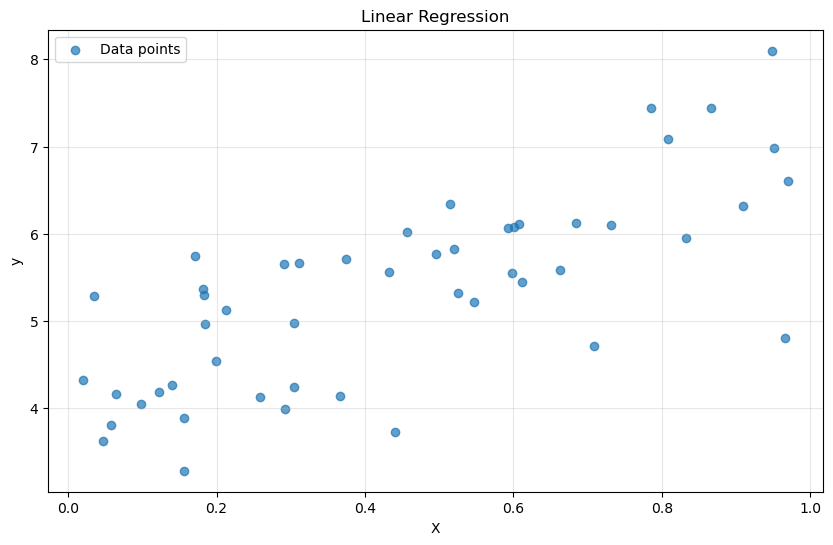

In [ ]:
np.random.seed(42)
def generate_data(n_samples=100, noise=0.5):
    X = np.random.rand(n_samples, 1)
    y = 4 + 3 * X + np.random.randn(n_samples, 1) * noise
    return X, y

X, y = generate_data(n_samples=50, noise=0.8)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [3]:
##    Compute Mean Squared Error (MSE)
## m: Averages the error over all training examples

def compute_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    loss = (1/(2*m)) * np.sum((predictions - y)**2)
    return loss

In [4]:
# Compute gradient of MSE loss
# 
def compute_gradient(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    gradient = (1/m) * X.T.dot(predictions - y)
    return gradient

# a bias term 
X_b = np.c_[np.ones((len(X), 1)), X]  # Add x0 = 1 to each instance

In [5]:
# In the following algorithm we the perfom the gradient descent with three convergence criteria:



def gradient_descent(X, y, learning_rate=0.1, n_iterations=1000, 
                            theta_init=None, tolerance=1e-6, patience=10):
    
    if theta_init is None:
        theta_init = np.random.randn(X.shape[1], 1)
    
    theta = theta_init.copy()
    theta_history = [theta.flatten().copy()]
    loss_history = [compute_loss(X, y, theta)]
    
    # Track best parameters
    best_theta = theta.copy()
    best_loss = loss_history[0]
    no_improvement_count = 0
    
    for iteration in range(n_iterations):
        gradient = compute_gradient(X, y, theta)
        theta_old = theta.copy()
        theta = theta - learning_rate * gradient
        
        # Calculate current loss
        current_loss = compute_loss(X, y, theta)
        
        # Save history
        theta_history.append(theta.flatten().copy())
        loss_history.append(current_loss)
        
        # Update best parameters if improvement found
        if current_loss < best_loss:
            best_theta = theta.copy()
            best_loss = current_loss
            no_improvement_count = 0
        else:
            no_improvement_count += 1
        
        # Convergence Criteria 1: Loss change too small
        loss_change = abs(loss_history[-2] - current_loss)
        if loss_change < tolerance:
            print(f"Converged after {iteration} iterations: Loss change < {tolerance}")
            break
        
        # Convergence Criteria 2: Gradient magnitude too small
        gradient_norm = np.linalg.norm(gradient)
        if gradient_norm < tolerance:
            print(f"Converged after {iteration} iterations: Gradient norm < {tolerance}")
            break
        
        # Convergence Criteria 3: No improvement for 'patience' iterations
        if no_improvement_count >= patience:
            print(f"Converged after {iteration} iterations: No improvement for {patience} iterations")
            break
    
    return best_theta, np.array(theta_history), np.array(loss_history)

Text(0.5, 1.0, 'Loss Function Contour')

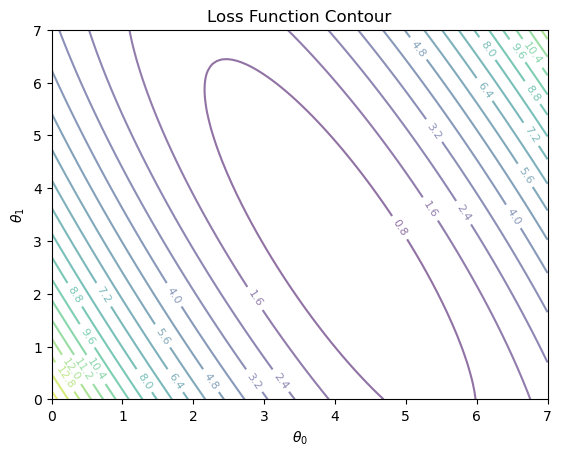

In [6]:
# Generate parameter space for contour plot
# something like priors?
theta0 = np.linspace(0.0, 7.0, 100)
theta1 = np.linspace(0.0, 7.0, 100)

Theta0, Theta1 = np.meshgrid(theta0, theta1)
Loss = np.zeros_like(Theta0)

for i in range(Theta0.shape[0]):
    for j in range(Theta0.shape[1]):
        theta_temp = np.array([Theta0[i, j], Theta1[i, j]]).reshape(-1, 1)
        Loss[i, j] = compute_loss(X_b, y, theta_temp)

# Plot contour
contour = plt.contour(Theta0, Theta1, Loss, levels=20, alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')
plt.title('Loss Function Contour')

Converged after 61 iterations: Loss change < 1e-06


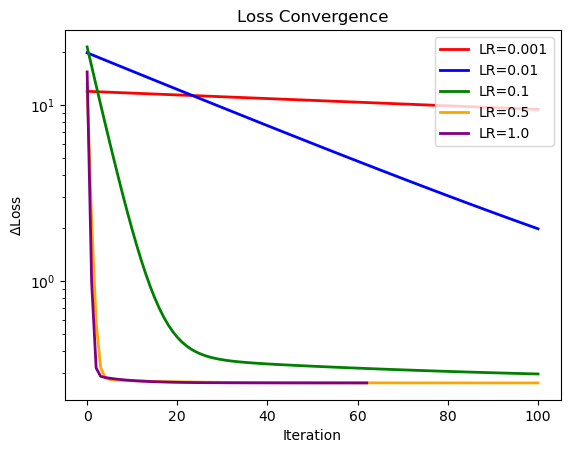

In [7]:

learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
colors = ['red', 'blue', 'green', 'orange', 'purple']
for lr, color in zip(learning_rates, colors):
    _, _, loss_history = gradient_descent(
        X_b, y, learning_rate=lr, n_iterations=100
    )
    plt.plot(loss_history, color=color, linewidth=2, label=f'LR={lr}')
plt.xlabel('Iteration')
plt.ylabel('$\Delta $Loss')
plt.title('Loss Convergence')
plt.legend(loc="upper right")
plt.yscale('log')

Converged after 298 iterations: Loss change < 1e-06
Converged after 124 iterations: Loss change < 1e-06
Converged after 60 iterations: Loss change < 1e-06


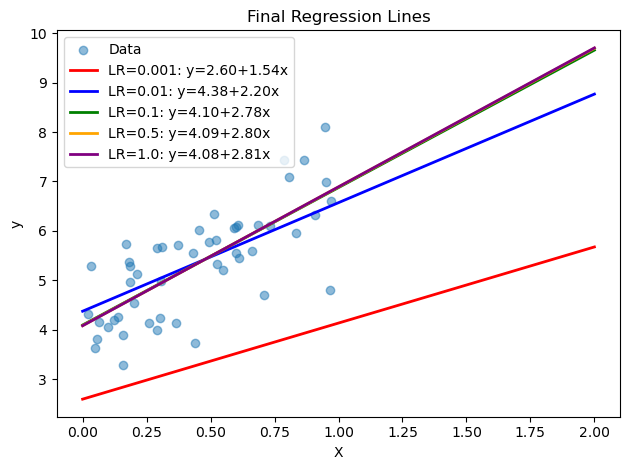

In [8]:
# Plot final models
plt.scatter(X, y, alpha=0.5, label='Data')
x_plot = np.linspace(0, 2, 100)

for lr, color in zip(learning_rates, colors):
    theta_opt, _, _ = gradient_descent(
        X_b, y, learning_rate=lr, n_iterations=1000
    )
    y_plot = theta_opt[0] + theta_opt[1] * x_plot
    plt.plot(x_plot, y_plot, color=color, linewidth=2, 
             label=f'LR={lr}: y={theta_opt[0][0]:.2f}+{theta_opt[1][0]:.2f}x')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Final Regression Lines')
plt.legend()

plt.tight_layout()

Text(0.5, 0.92, '3D Loss Surface')

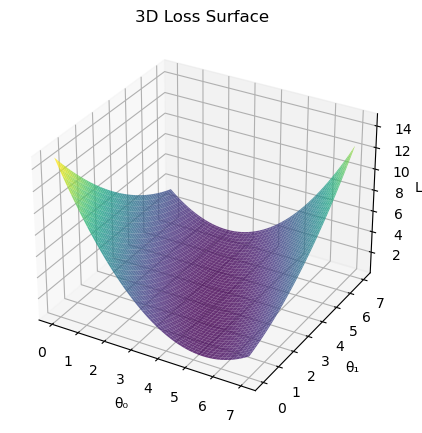

In [9]:
# Create 3D surface plot
fig = plt.figure(figsize=(12, 5))

# Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(Theta0, Theta1, Loss, cmap=cm.viridis, 
                       alpha=0.8, linewidth=0, antialiased=True)
ax1.set_xlabel('θ₀')
ax1.set_ylabel('θ₁')
ax1.set_zlabel('Loss')
ax1.set_title('3D Loss Surface')

In [ ]:
def split(X, Y, train_ratio=0.5, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    n_samples = len(X)
    n_train = math.floor(train_ratio * n_samples)
    
    # Shuffle indices
    indices = np.random.permutation(n_samples)
    train_indices = indices[:n_train]
    val_indices = indices[n_train:]
    X_learn = X[train_indices]
    Y_learn = Y[train_indices]
    X_val = X[val_indices]
    Y_val = Y[val_indices]
    
    return X_learn, Y_learn, X_val, Y_val

In [19]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [23]:
# x: Input features matrix (samples × features)
# y: Target output matrix (samples × outputs)
# nodos: Input features matrix (samples × features)
# Input features matrix (samples × features)
# learning_rate: Input features matrix (samples × features)
# epocas: Number of training epochs
# activation: Input features matrix (samples × features)
# deactivation: Derivative of activation function
# batch_size: Size of mini-batches for training

def neuralnet(X, Y, nodos, train_ratio, learning_rate, epocas, activation, dactivation, batch_size=32, random_state=None):

    
    # Network structure
    n_entradas = X.shape[1]
    n_salidas = Y.shape[1]
    
    # Split data using the provided split function
    X_learn, Y_learn, X_val, Y_val = split(X, Y, train_ratio, random_state=random_state)
    n_train = len(X_learn)
    
    print(f"Training samples: {n_train}, Validation samples: {len(X_val)}")
    print(f"Batch size: {batch_size}, Batches per epoch: {np.ceil(n_train / batch_size).astype(int)}")
    
    # Weight initialization with RANDOM biases
    W1 = np.random.randn(n_entradas, nodos) * np.sqrt(2.0 / (n_entradas + nodos))
    W2 = np.random.randn(nodos, n_salidas) * np.sqrt(2.0 / (nodos + n_salidas))
    
    # Random bias initialization (corrected dimensions)
    b1 = np.random.randn(1, nodos) * 0.1  # Shape: (1, hidden_neurons)
    b2 = np.random.randn(1, n_salidas) * 0.1  # Shape: (1, output_units)
    
    # Track errors
    training_errors = []
    validation_errors = []
    
    for epoch in range(epocas + 1):
        epoch_losses = []
        
        # Shuffle training data each epoch
        indices = np.random.permutation(n_train)
        X_shuffled = X_learn[indices]
        Y_shuffled = Y_learn[indices]
        
        # Process mini-batches
        for start_idx in range(0, n_train, batch_size):
            end_idx = min(start_idx + batch_size, n_train)
            
            # Get current batch
            X_batch = X_shuffled[start_idx:end_idx]
            Y_batch = Y_shuffled[start_idx:end_idx]
            current_batch_size = len(X_batch)
            
            # Forward propagation
            z1 = np.dot(X_batch, W1) + b1  # b1 broadcasts to (batch_size, nodos)
            a1 = activation(z1)
            z2 = np.dot(a1, W2) + b2       # b2 broadcasts to (batch_size, n_salidas)
            a2 = z2
            
            # Backpropagation
            delta2 = (a2 - Y_batch) / current_batch_size
            delta1 = np.dot(delta2, W2.T) * dactivation(z1)
            
            # Store batch loss
            batch_loss = mean_squared_error(a2, Y_batch)
            epoch_losses.append(batch_loss)
            
            # Weight updates
            W2 -= learning_rate * np.dot(a1.T, delta2 * current_batch_size)
            b2 -= learning_rate * np.sum(delta2 * current_batch_size, axis=0, keepdims=True)
            W1 -= learning_rate * np.dot(X_batch.T, delta1)
            b1 -= learning_rate * np.sum(delta1, axis=0, keepdims=True)
        
        # Average loss for this epoch
        avg_epoch_loss = np.mean(epoch_losses)
        training_errors.append(avg_epoch_loss)
        
        # Validation
        val_predictions = forward(X_val, W1, b1, W2, b2, activation)
        val_error = mean_squared_error(val_predictions, Y_val)
        validation_errors.append(val_error)
        
        if epoch % 100 == 0:
            print(f"Época {epoch:4d} | Train MSE: {avg_epoch_loss:.6f} | Val MSE: {val_error:.6f}")
    
    return W1, b1, W2, b2, training_errors, validation_errors, X_learn, Y_learn, X_val, Y_val

In [25]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

In [31]:
def forward(X, W1, b1, W2, b2, activation):
    z1 = np.dot(X, W1) + b1
    a1 = activation(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = z2  # Linear output for regression
    return a2

In [ ]:
nodos = 10
train_ratio = 0.8
learning_rate = 0.01
epocas = 500
batch_size = 32

X_train, y_train, X_test, y_test = split(X, y, train_ratio=0.8, random_state=42)

X_train_scaled = X_train.copy()
y_train_scaled = y_train.copy()
X_test_scaled = X_test.copy()
y_test_scaled = y_test.copy()

# Train the network
W1, b1, W2, b2, train_errors, val_errors, X_learn, Y_learn, X_val, Y_val = neuralnet(
    X_train_scaled, y_train_scaled, nodos, train_ratio, 
    learning_rate, epocas, relu, relu_derivative, batch_size, random_state=42
)

Training samples: 32, Validation samples: 8
Batch size: 32, Batches per epoch: 1
Época    0 | Train MSE: 34.200826 | Val MSE: 17.812461
Época  100 | Train MSE: 0.474420 | Val MSE: 0.948103
Época  200 | Train MSE: 0.469404 | Val MSE: 0.907773
Época  300 | Train MSE: 0.467974 | Val MSE: 0.907257
Época  400 | Train MSE: 0.466507 | Val MSE: 0.910410
Época  500 | Train MSE: 0.464911 | Val MSE: 0.914210
